<a href="https://colab.research.google.com/github/Philocreation/My_Machine_Learning/blob/main/Template/various_Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 릿지 회귀(Ridge Regression)

* 릿지 회귀는 선형 회귀를 개선한 선형 모델
* 릿지 회귀는 선형 회귀와 비슷하지만, 가중치의 절대값을 최대한 작게 만든다는 것이 다름
* 이러한 방법은 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
* 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
* 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
* 릿지 회귀는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 사용자가 지정하는 매개변수
  * $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐

## 보스턴 주택 가격에 대한 릿지 회귀

In [2]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [4]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [9]:
model = Ridge(alpha=0.1)
model.fit(X_train,y_train)

Ridge(alpha=0.1)

In [10]:
print('학습 데이터 점수 ={}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 ={}'.format(model.score(X_test,y_test)))

학습 데이터 점수 =0.7435711047286665
평가 데이터 점수 =0.7130531103161013


In [17]:
import matplotlib.pyplot as plt


def plot_boston_prices(sxpected, predicted):
  plt.figure(figsize=(8,4))
  plt.scatter(expected, predicted)
  plt.plot([5,50],[5,50],'--r')
  plt.xlabel('True price ($1,000s)')
  plt.ylabel('predicted price($1,000s)')
  plt.tight_layout()


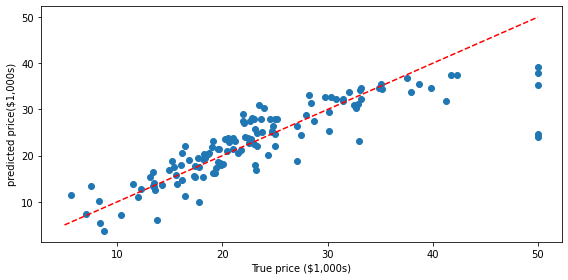

In [18]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

* 릿지 회귀는 가중치에 제약을 두기 때문에 선형 회귀 모델보다 훈련 데이터 점수가 낮을 수 있음
* 일반화 성능은 릿지 회귀가 더 높기 때문에 평가 데이터 점수는 릿지 회귀가 더 좋음

* 일반화 성능에 영향을 주는 매개 변수인 $\alpha$ 값을 조정해 보면서 릿지 회귀 분석의 성능이 어떻게 변하는지 확인 필요

## 캘리포니아 주택 가격에 대한 릿지 회귀

In [21]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [32]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [33]:
print('학습 데이터 점수 = {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 = {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 = 0.605836868731654
평가 데이터 점수 = 0.6043219357660814


In [35]:
def plot_california_prices(expected, predicted):
  plt.figure(figsize=(15,10))
  plt.scatter(expected,predicted)
  plt.plot([0,5],[0,5],'--r')
  plt.xlabel('Ture price($100,000s)')
  plt.ylabel('Predicted price ($100,000s)')
  plt.tight_layout()

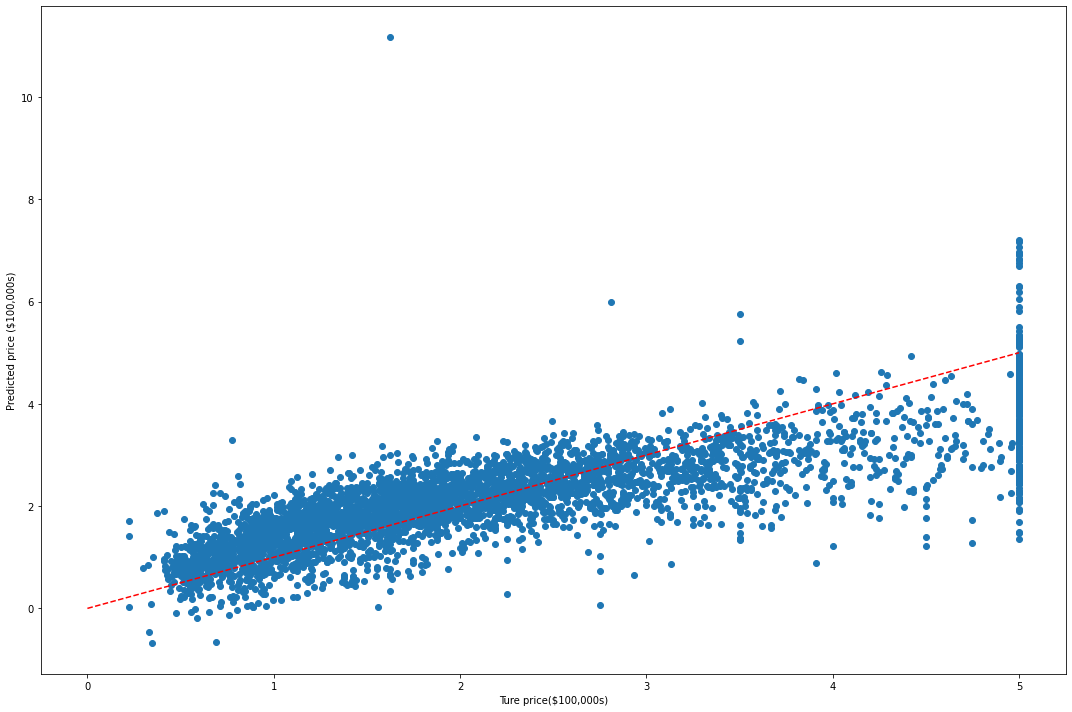

In [36]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

# 라쏘 회귀(Lasso Regression)

* 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
* 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용

* 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}

* 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능

## 보스턴 주택 가격에 대한 라쏘 회귀

In [37]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [38]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [39]:
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [40]:
print('학습 데이터 점수 = {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 = {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 = 0.7303330767833294
평가 데이터 점수 = 0.7787522511403511


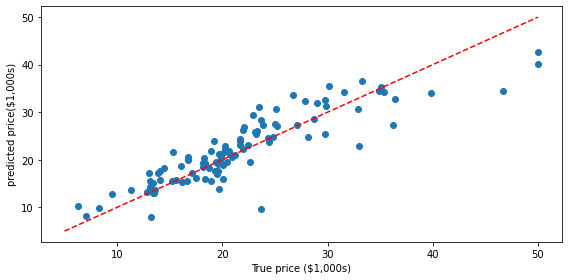

In [41]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

## 캘리포니아 주택 가격에 대한 라쏘 회귀

In [42]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [43]:
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [44]:
print('학습 데이터 점수 = {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 = {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 = 0.6043691701031304
평가 데이터 점수 = 0.6105664251131877


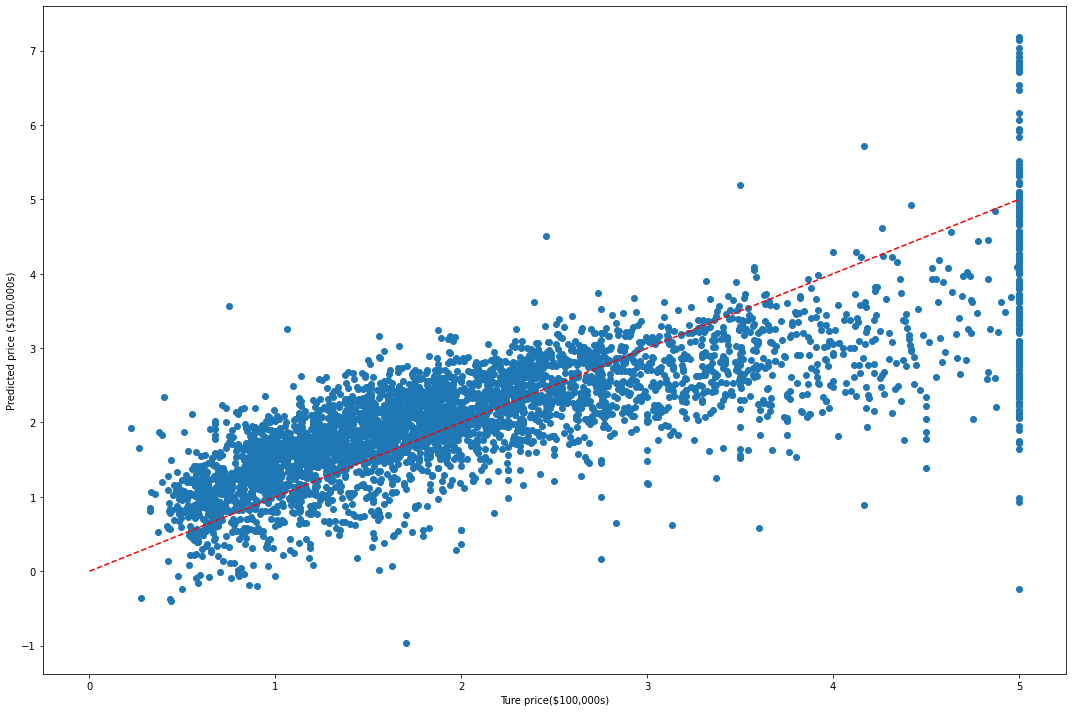

In [46]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

# 신축망 (Elastic-Net)

* 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
* 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
* 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 줌

* 신축망은 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 규제의 강도를 조절하는 매개변수
  + $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

## 보스턴 주택 가격에 대한 신축망 

In [70]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [71]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [72]:
model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [73]:
print('학습 데이터 점수 = {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 = {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 = 0.7353552439737656
평가 데이터 점수 = 0.7305469987706132


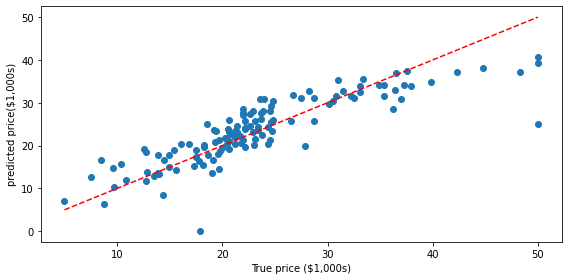

In [74]:
predicted = model.predict(X_test)
expected = y_test
plot_boston_prices(expected, predicted)

## 캘리포니아 주택 가격에 대한 신축망 

In [75]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)


In [76]:
model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [77]:
print('학습 데이터 점수 = {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 = {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 = 0.601419953936972
평가 데이터 점수 = 0.6174788018618385


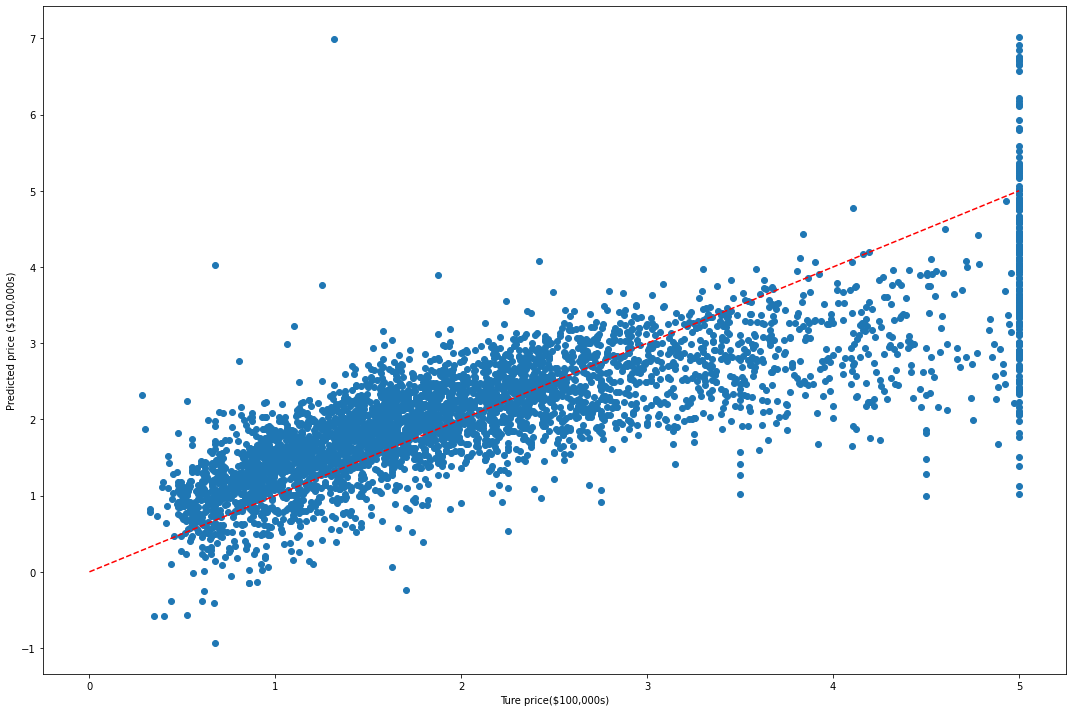

In [78]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 직교 정합 추구 (Orthogonal Matching Pursuit)

* 직교 정합 추구 방법은 모델에 존재하는 가중치 벡터에 특별한 제약을 거는 방법

* 직교 정합 추구 방법은 다음을 만족하는 파라미터 $w$를 찾는것이 목표

\begin{equation}
\underset{w}{\arg \min} \; ||y - \hat{y}||^2_2 \; subject \; to \; ||w||_0 \leq k
\end{equation}

  + $||w||_0$: 가중치 벡터 $w$에서 0이 아닌 값의 개수

* 직교 정합 추구 방법은 가중치 벡터 $w$에서 0이 아닌 값이 $k$개 이하가 되도록 훈련됨
* 이러한 방법은 모델이 필요 없는 데이터 특성을 훈련 과정에서 자동으로 제거 하도록 만들 수 있음

In [79]:
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [80]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [83]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=7)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


OrthogonalMatchingPursuit(n_nonzero_coefs=7)

In [86]:
print('학습 데이터 점수 = {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 = {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 = 0.7307346841227628
평가 데이터 점수 = 0.6725397638273037


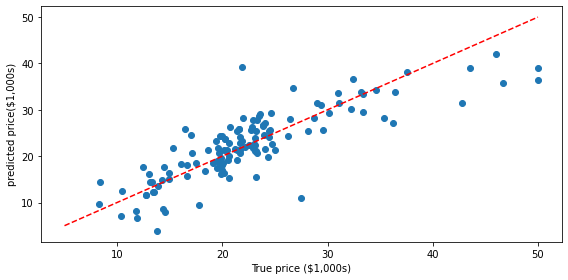

In [87]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

* 직교 정합 추구 방법은 위에서 설명한 제약 조건 대신에 다음 조건을 만족하도록 변경 가능

\begin{equation}
\underset{w}{\arg \min} \; ||w||_0 \; subject \; to \; ||y - \hat{y}||^2_2 \leq tol
\end{equation}

  + $||y - \hat{y}||^2_2$는 $\sum_{i=1}^N (y - \hat{y})^2$와 같은 의미

* 위의 식을 통해서 직교 정합 추구 방법을 $y$와 $\hat{y}$ 사이의 오차 제곱 합을 $tol$ 이하로 하면서 $||w||_0$를 최소로 하는 모델로 대체 가능

In [88]:
model = OrthogonalMatchingPursuit(tol=1.0)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_omp.py:766: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  return_n_iter=True,


OrthogonalMatchingPursuit(tol=1.0)

In [89]:
print('학습 데이터 점수 = {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 = {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 = 0.7504120720296986
평가 데이터 점수 = 0.6791733231996141


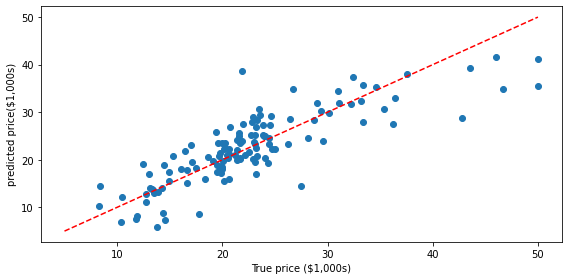

In [90]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

## 캘리포니아 주택 가격에 대한 직교 정합 추구 

In [92]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [93]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=5)
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


OrthogonalMatchingPursuit(n_nonzero_coefs=5)

In [94]:
print('학습 데이터 점수 = {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 = {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 = 0.600365536019908
평가 데이터 점수 = 0.5924782316275234


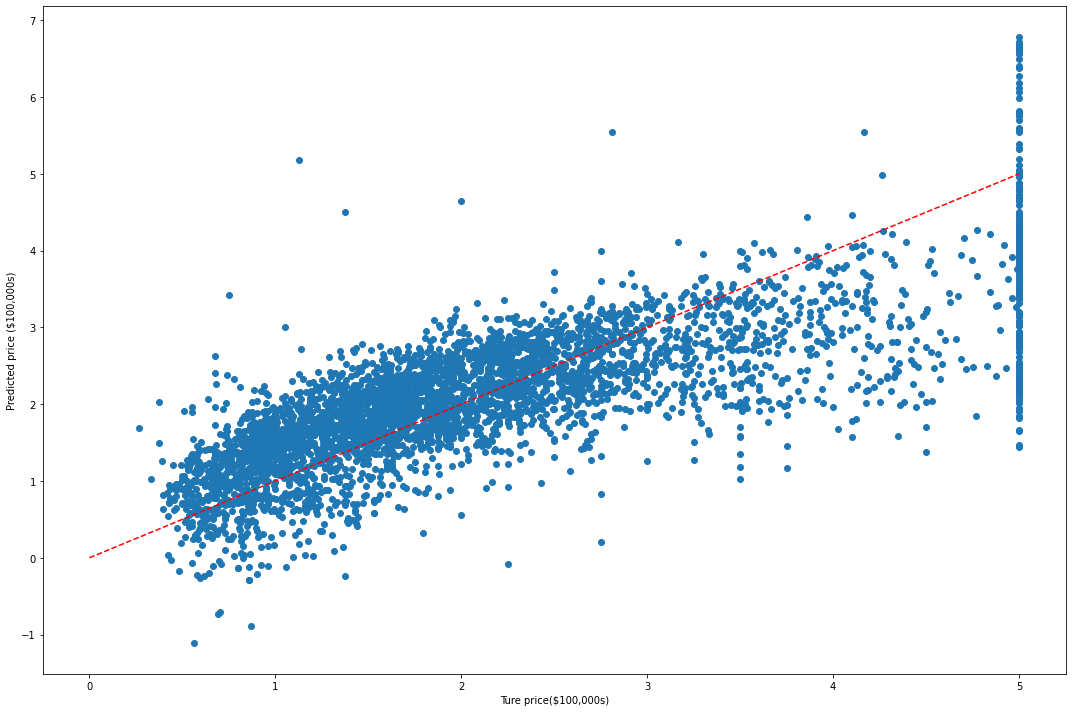

In [95]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

In [96]:
model =OrthogonalMatchingPursuit(tol=1.0)
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_omp.py:766: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  return_n_iter=True,


OrthogonalMatchingPursuit(tol=1.0)

In [97]:
print('학습 데이터 점수 = {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 = {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 = 0.6077744314572437
평가 데이터 점수 = 0.5994439189207922


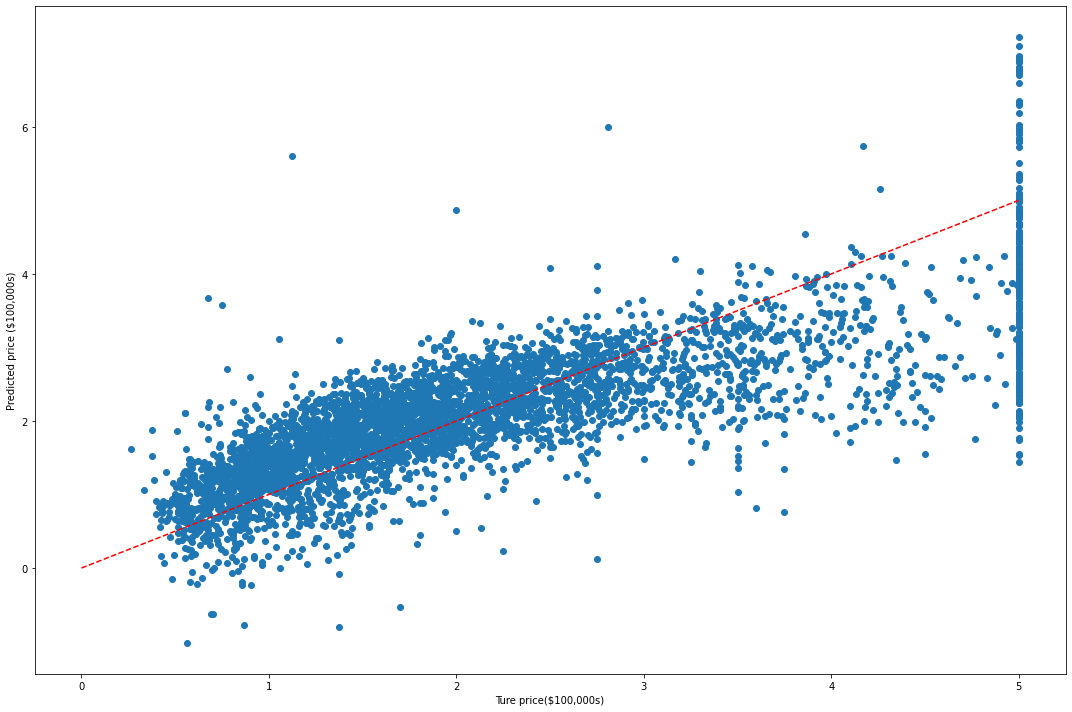

In [99]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

# 다항 회귀 (Polynomial Regression)

* 입력 데이터를 비선형 변환 후 사용하는 방법
* 모델 자체는 선형 모델

\begin{equation}
\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_1^2 + w_5 x_2^2
\end{equation}

* 차수가 높아질수록 더 복잡한 데이터 학습 가능

![polynomial regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_polynomial_interpolation_0011.png)


In [100]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [101]:
X,y = load_boston(return_X_y=True)
X_train,X_test, y_train, y_test= train_test_split(X,y, random_state=123)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [102]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [103]:
print('학습 데이터 점수 = {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 = {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 = 0.9346787783950696
평가 데이터 점수 = 0.825786471800239


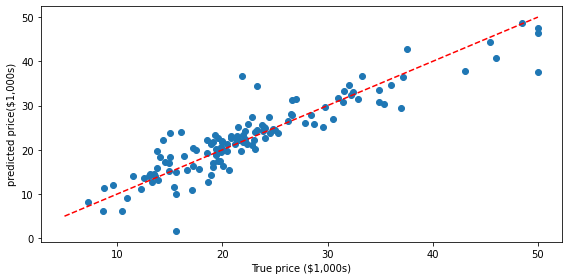

In [104]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

## 캘리포니아 주택 가격에 대한 다항 회귀 

In [130]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [131]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [132]:
print('학습 데이터 점수 = {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 = {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 = 0.682686663683675
평가 데이터 점수 = 0.6656613373388525


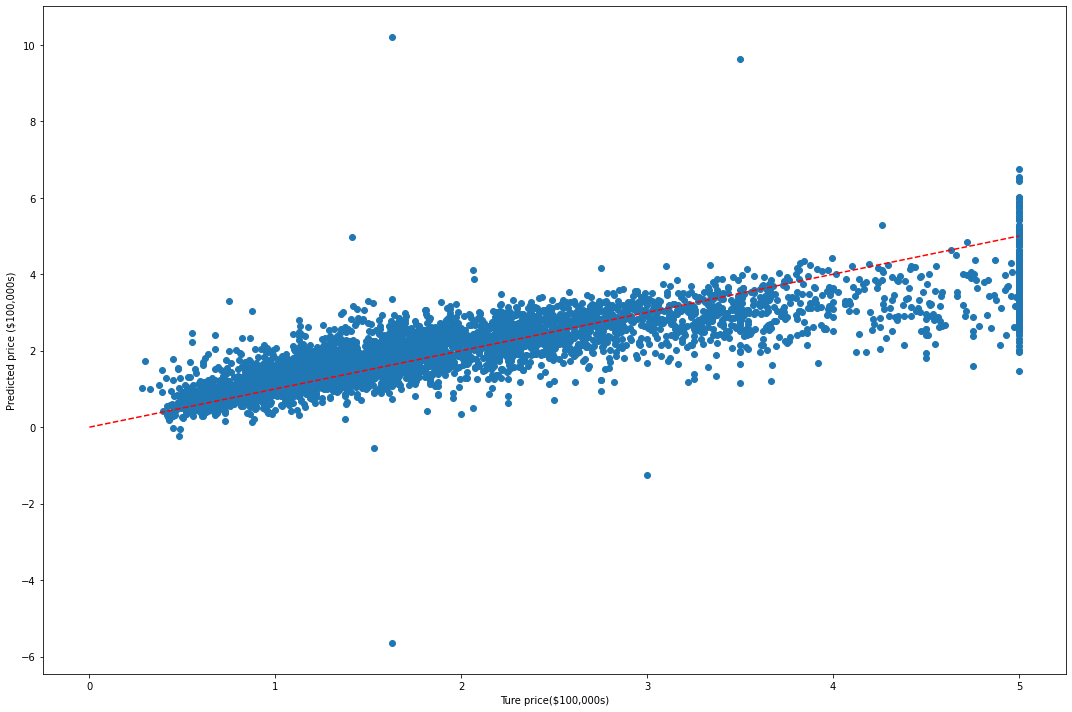

In [134]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)